<a href="https://colab.research.google.com/github/kudupuditejasree/week2/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tejasreekudupudi","key":"15e8d92a6d692f802b823c4ba41bfa40"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset

Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 680MB/s]


In [5]:
!unzip trash-type-image-dataset.zip -d trash_images

Archive:  trash-type-image-dataset.zip
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_009.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_010.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_011.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_012.jpg  
 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr

In [7]:
import zipfile
import os

zip_path = '/content/trash-type-image-dataset.zip'
extract_path = '/content/trash_images'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [8]:
import os
for root, dirs, files in os.walk(extract_path):
    print(root, "contains", len(files), "files")
    break  # Just print the top level

/content/trash_images contains 0 files


In [9]:
import os
for root, dirs, files in os.walk('/content/trash_images'):
    print(f"Directory: {root}")
    print(f"Contains {len(files)} files")
    print(f"Files: {files}")

Directory: /content/trash_images
Contains 0 files
Files: []
Directory: /content/trash_images/TrashType_Image_Dataset
Contains 0 files
Files: []
Directory: /content/trash_images/TrashType_Image_Dataset/glass
Contains 501 files
Files: ['glass_169.jpg', 'glass_272.jpg', 'glass_082.jpg', 'glass_449.jpg', 'glass_043.jpg', 'glass_017.jpg', 'glass_345.jpg', 'glass_338.jpg', 'glass_104.jpg', 'glass_011.jpg', 'glass_029.jpg', 'glass_019.jpg', 'glass_485.jpg', 'glass_457.jpg', 'glass_151.jpg', 'glass_168.jpg', 'glass_138.jpg', 'glass_476.jpg', 'glass_329.jpg', 'glass_100.jpg', 'glass_266.jpg', 'glass_443.jpg', 'glass_112.jpg', 'glass_271.jpg', 'glass_144.jpg', 'glass_333.jpg', 'glass_197.jpg', 'glass_037.jpg', 'glass_127.jpg', 'glass_155.jpg', 'glass_326.jpg', 'glass_232.jpg', 'glass_167.jpg', 'glass_060.jpg', 'glass_238.jpg', 'glass_353.jpg', 'glass_458.jpg', 'glass_118.jpg', 'glass_294.jpg', 'glass_299.jpg', 'glass_035.jpg', 'glass_109.jpg', 'glass_285.jpg', 'glass_407.jpg', 'glass_462.jpg', '

In [10]:
import shutil
src_dir = '/content/trash_images'
for root, dirs, files in os.walk(src_dir):
    for file in files:
        src_file = os.path.join(root, file)
        dst_file = os.path.join(src_dir, file)
        shutil.move(src_file, dst_file)


In [11]:
import zipfile
with zipfile.ZipFile('/content/trash-type-image-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/trash_images')

In [12]:
import os
import shutil

src_dir = '/content/trash_images/TrashType_Image_Dataset'
dst_dir = '/content/dataset'

# Create destination folders for each class
classes = os.listdir(src_dir)
for cls in classes:
    os.makedirs(os.path.join(dst_dir, cls), exist_ok=True)

# Move images to the appropriate folders
for cls in classes:
    class_path = os.path.join(src_dir, cls)
    for file in os.listdir(class_path):
        src_file = os.path.join(class_path, file)
        dst_file = os.path.join(dst_dir, cls, file)
        shutil.move(src_file, dst_file)


In [13]:
import os
for cls in os.listdir(dst_dir):
    print(cls, "->", len(os.listdir(os.path.join(dst_dir, cls))), "images")


glass -> 501 images
trash -> 137 images
paper -> 594 images
cardboard -> 403 images
metal -> 410 images
plastic -> 482 images


In [14]:
import os

print("Contents of 'trash_images':")
print(os.listdir("trash_images"))


Contents of 'trash_images':
['plastic_101.jpg', 'paper_428.jpg', 'glass_169.jpg', 'paper_405.jpg', 'plastic_349.jpg', 'glass_272.jpg', 'metal_107.jpg', 'paper_409.jpg', 'metal_004.jpg', 'plastic_160.jpg', 'trash_082.jpg', 'paper_073.jpg', 'paper_178.jpg', 'cardboard_288.jpg', 'glass_082.jpg', 'plastic_336.jpg', 'metal_043.jpg', 'glass_449.jpg', 'glass_043.jpg', 'cardboard_287.jpg', 'trash_135.jpg', 'cardboard_313.jpg', 'plastic_472.jpg', 'paper_538.jpg', 'glass_017.jpg', 'glass_345.jpg', 'plastic_006.jpg', 'metal_136.jpg', 'glass_338.jpg', 'cardboard_279.jpg', 'paper_072.jpg', 'cardboard_193.jpg', 'metal_272.jpg', 'paper_137.jpg', 'cardboard_364.jpg', 'metal_253.jpg', 'cardboard_120.jpg', 'paper_307.jpg', 'cardboard_172.jpg', 'paper_158.jpg', 'glass_104.jpg', 'plastic_080.jpg', 'glass_011.jpg', 'paper_216.jpg', 'plastic_170.jpg', 'cardboard_292.jpg', 'metal_168.jpg', 'paper_016.jpg', 'paper_592.jpg', 'paper_272.jpg', 'glass_029.jpg', 'paper_053.jpg', 'glass_019.jpg', 'paper_401.jpg', '

In [15]:
import os
import shutil

src_dir = "dataset"  # or the correct folder with class folders inside
dst_dir = "trash_images"

classes = os.listdir(src_dir)

os.makedirs(dst_dir, exist_ok=True)

for cls in classes:
    class_path = os.path.join(src_dir, cls)
    if os.path.isdir(class_path):
        dst_class_path = os.path.join(dst_dir, cls)
        os.makedirs(dst_class_path, exist_ok=True)
        for file in os.listdir(class_path):
            src_file = os.path.join(class_path, file)
            dst_file = os.path.join(dst_class_path, file)
            shutil.copy(src_file, dst_file)


In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

dataset_dir = "trash_images"
image_size = (124, 124)
batch_size = 32
seed = 42

train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='int',
    class_names=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'] # Specify class names to exclude the empty directory
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='int',
    class_names=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'] # Specify class names to exclude the empty directory
)
val_class= val_ds.class_names

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [18]:
val_batches = tf.data.experimental.cardinality(val_ds)

test_ds = val_ds.take(val_batches // 2)

# Second half remains as the validation dataset
val_dat = val_ds.skip(val_batches // 2)

# Optimize test dataset by caching and prefetching to improve performance
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)

In [19]:
print(train_ds.class_names)
print(val_class)
print(len(train_ds.class_names))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


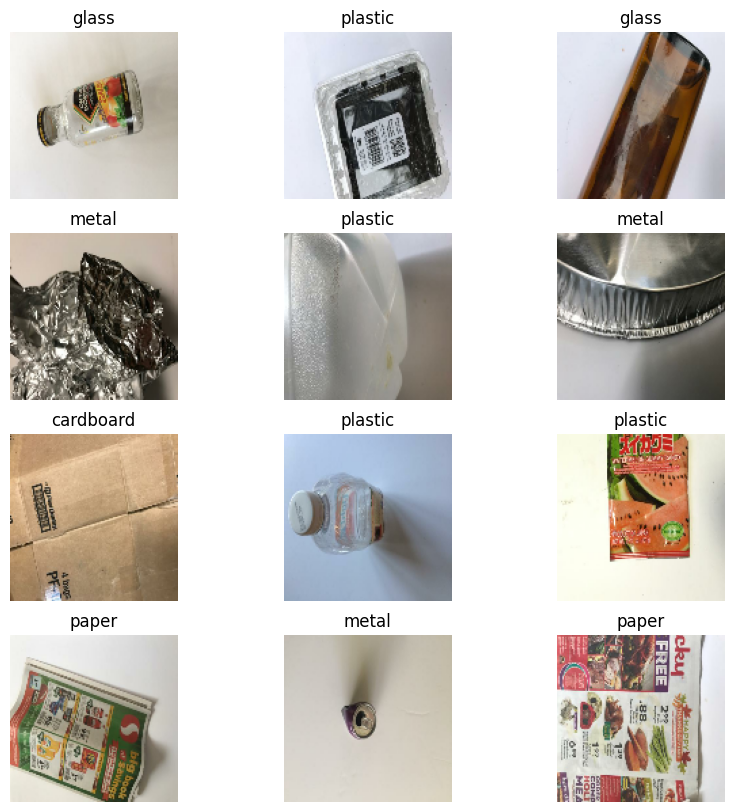

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [21]:
def count_distribution(dataset, class_names):
    total = 0
    counts = {name: 0 for name in class_names}

    for _, labels in dataset:
        for label in labels.numpy():
            class_name = class_names[label]
            counts[class_name] += 1
            total += 1

    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)  # Convert to percentage
    return counts

In [22]:
def simple_bar_plot(dist, title):
    plt.bar(dist.keys(), dist.values(), color='cornflowerblue')
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

In [23]:
class_names = train_ds.class_names

# Get class distributions
train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)
test_dist = count_distribution(test_ds, class_names)
overall_dist = {}
for k in class_names:
    overall_dist[k] = round((train_dist[k] + val_dist[k]) / 2, 2)

print(train_dist)
print(val_dist)
print(test_dist)
print(overall_dist)

{'cardboard': 16.52, 'glass': 19.73, 'metal': 15.92, 'paper': 23.29, 'plastic': 19.44, 'trash': 5.09}
{'cardboard': 13.66, 'glass': 20.2, 'metal': 17.43, 'paper': 24.36, 'plastic': 17.62, 'trash': 6.73}
{'cardboard': 14.06, 'glass': 17.58, 'metal': 16.8, 'paper': 25.0, 'plastic': 19.14, 'trash': 7.42}
{'cardboard': 15.09, 'glass': 19.96, 'metal': 16.68, 'paper': 23.82, 'plastic': 18.53, 'trash': 5.91}


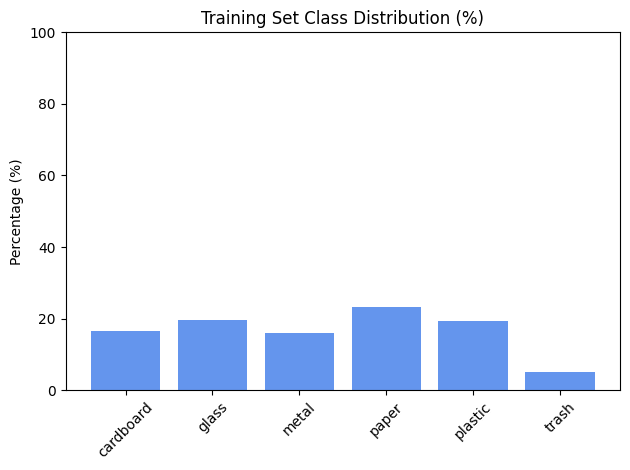

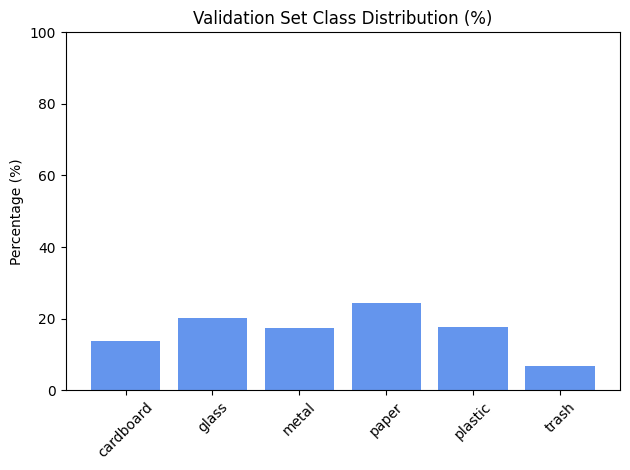

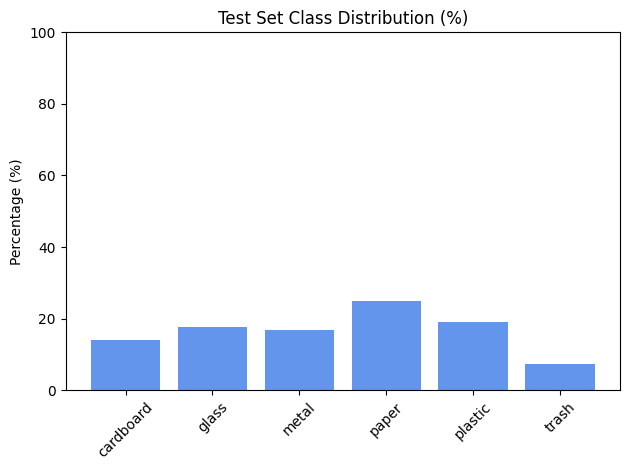

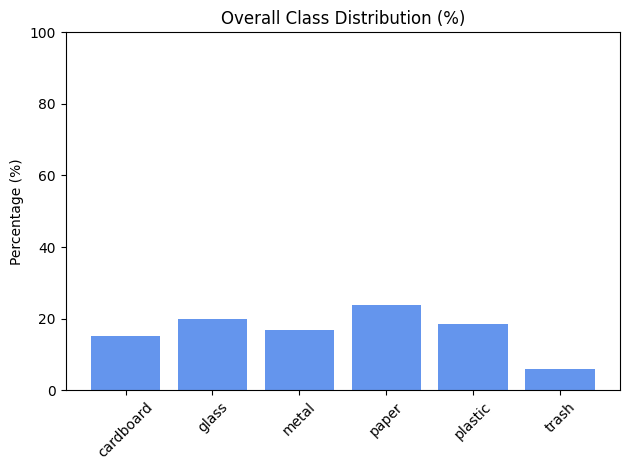

In [24]:
# Show visualizations
simple_bar_plot(train_dist, "Training Set Class Distribution (%)")
simple_bar_plot(val_dist, "Validation Set Class Distribution (%)")
simple_bar_plot(test_dist, "Test Set Class Distribution (%)")
simple_bar_plot(overall_dist, "Overall Class Distribution (%)")

In [25]:
# Get original class names from the dataset (may include unwanted directory)
original_class_names = train_ds.class_names

# Define the correct class names (excluding the unwanted directory)
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Create a mapping from original class indices to correct class indices
class_mapping = {original_class_names.index(name): i for i, name in enumerate(class_names)}

def count_distribution(dataset, class_names, class_mapping):
    total = 0
    counts = {name: 0 for name in class_names}

    for _, labels in dataset:
        for label in labels.numpy():
            if label in class_mapping:  # Check if the original label is in our mapping
                correct_label_index = class_mapping[label]
                class_name = class_names[correct_label_index]
                counts[class_name] += 1
                total += 1

    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)  # Convert to percentage
    return counts


# Get class distributions using the corrected mapping
train_dist = count_distribution(train_ds, class_names, class_mapping)
val_dist = count_distribution(val_ds, class_names, class_mapping)
test_dist = count_distribution(test_ds, class_names, class_mapping)
overall_dist = {}
for k in class_names:
    overall_dist[k] = round((overall_dist.get(k, 0) + train_dist.get(k, 0) + val_dist.get(k, 0)) / (1 + (1 if k in train_dist else 0) + (1 if k in val_dist else 0)), 2)


print(train_dist)
print(val_dist)
print(test_dist)
print(overall_dist)

class_counts = {i: 0 for i in range(len(class_names))}
all_labels = []

for images, labels in train_ds:
    for label in labels.numpy():
        if label in class_mapping:
            correct_label_index = class_mapping[label]
            class_counts[correct_label_index] += 1
            all_labels.append(correct_label_index)


# Compute class weights (index aligned)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(class_names)),
    y=all_labels
)

# Create dictionary mapping class index to weight
class_weights = {i: w for i, w in enumerate(class_weights_array)}

{'cardboard': 16.52, 'glass': 19.73, 'metal': 15.92, 'paper': 23.29, 'plastic': 19.44, 'trash': 5.09}
{'cardboard': 13.66, 'glass': 20.2, 'metal': 17.43, 'paper': 24.36, 'plastic': 17.62, 'trash': 6.73}
{'cardboard': 11.72, 'glass': 19.14, 'metal': 20.7, 'paper': 25.78, 'plastic': 15.62, 'trash': 7.03}
{'cardboard': 10.06, 'glass': 13.31, 'metal': 11.12, 'paper': 15.88, 'plastic': 12.35, 'trash': 3.94}


In [26]:
print("Class Counts:", class_counts)
print("Class Weights:", class_weights)

Class Counts: {0: 334, 1: 399, 2: 322, 3: 471, 4: 393, 5: 103}
Class Weights: {0: np.float64(1.0089820359281436), 1: np.float64(0.8446115288220551), 2: np.float64(1.046583850931677), 3: np.float64(0.7154989384288747), 4: np.float64(0.8575063613231552), 5: np.float64(3.2718446601941746)}


In [27]:
#  Define data augmentation pipeline
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


In [28]:
#  Load the pretrained MobileNetV3Small model (without the top classification layer)
base_model = EfficientNetV2B2(include_top=False, input_shape=(124, 124, 3),include_preprocessing=True, weights='imagenet')


#  Freeze early layers (to retain general pretrained features)
base_model.trainable = True
for layer in base_model.layers[:100]:  # You can adjust this number
    layer.trainable = False

35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
#  Build the final model
model = Sequential([
    layers.Input(shape=(124, 124, 3)),
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')  # Change to your number of classes
])

In [30]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Number of epochs to wait after last improvement before stopping
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)

In [32]:
epochs = 15  # Number of times the model will go through the entire dataset

# Train the model using the fit function
history = model.fit(
    train_ds,                # Training dataset used to adjust model weights
    validation_data=val_ds,   # Validation dataset to monitor performance on unseen data
    epochs=epochs,           # Number of training cycles, referencing the variable set earlier
    class_weight=class_weights,  # Handles class imbalances by assigning appropriate weights
    batch_size=32,           # Number of samples processed in each training step
    callbacks=[early]        # Implements early stopping to prevent unnecessary training
)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.2832 - loss: 1.7039 - val_accuracy: 0.6079 - val_loss: 1.1830
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.6669 - loss: 1.0847 - val_accuracy: 0.7287 - val_loss: 0.8116
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7664 - loss: 0.7407 - val_accuracy: 0.8257 - val_loss: 0.5815
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.8234 - loss: 0.5298 - val_accuracy: 0.8634 - val_loss: 0.4622
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.8838 - loss: 0.3672 - val_accuracy: 0.8792 - val_loss: 0.4126
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9127 - loss: 0.2659 - val_accuracy: 0.8713 - val_loss: 0.3579
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9360 - loss: 0.2376 - val_accuracy: 0.8871 - val_loss: 0.3583
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9445 - loss: 0.1860 - val_accuracy: 0.9129 - v

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 124, 124, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b2 (Functional)  │ (None, 4, 4, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         8,454 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,727,114 (94.33 MB)

 Trainable params: 7,974,642 (30.42 MB)

 Non-trainable params: 803,186 (3.06 MB)

 Optimizer params: 15,949,286 (60.84 MB)

In [34]:
base_model.summary() # Print the architecture summary of the base model

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 124, 124,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 124, 124,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 124, 124,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 62, 62,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 62, 62,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 62, 62,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 62, 62,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 62, 62,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 62, 62,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 62, 62,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 62, 62,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 62, 62,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 62, 62,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 62, 62,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 31, 31,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 31, 31,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 31, 31,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 7,966,188 (30.39 MB)

 Non-trainable params: 803,186 (3.06 MB)

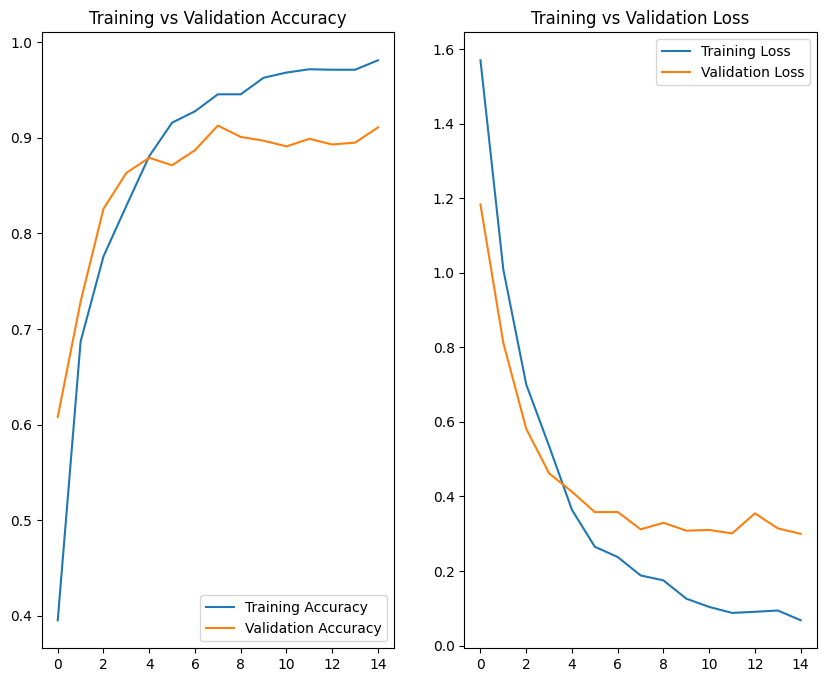

In [35]:
acc = history.history['accuracy']          # Extract training accuracy from history
val_acc = history.history['val_accuracy']  # Extract validation accuracy from history
loss = history.history['loss']             # Extract training loss from history
val_loss = history.history['val_loss']     # Extract validation loss from history

epochs_range = range(len(acc))             # Define range for epochs based on accuracy length

plt.figure(figsize=(10,8))                 # Set overall figure size for visualization

plt.subplot(1,2,1)                         # Create first subplot (1 row, 2 columns, position 1)
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Place legend in lower-right corner
plt.title('Training vs Validation Accuracy') # Add title for accuracy plot

plt.subplot(1,2,2)                         # Create second subplot (1 row, 2 columns, position 2)
plt.plot(epochs_range, loss, label='Training Loss')         # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')   # Plot validation loss
plt.legend(loc='upper right')              # Place legend in upper-right corner
plt.title('Training vs Validation Loss')   # Add title for loss plot

plt.show()

In [36]:
from tensorflow.keras.utils import image_dataset_from_directory

dataset_dir = "trash_images"
image_size = (124, 124)
batch_size = 32
seed = 42

train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='int',
    class_names=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'] # Specify class names to exclude the empty directory
)

class_names = train_ds.class_names
print("Final classes:", class_names)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Final classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [37]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='int',
    class_names=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'] # Specify class names to exclude the empty directory
)
val_class= val_ds.class_names

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [38]:
val_batches = tf.data.experimental.cardinality(val_ds)

test_ds = val_ds.take(val_batches // 2)

# Second half remains as the validation dataset
val_dat = val_ds.skip(val_batches // 2)

# Optimize test dataset by caching and prefetching to improve performance
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)

In [39]:
loss, accuracy = model.evaluate(test_ds_eval)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 631ms/step - accuracy: 0.9358 - loss: 0.2642
Test accuracy is0.9297, Test loss is 0.2694


In [40]:
# Extract true labels from all batches in the test dataset
y_true = np.concatenate([y.numpy() for x, y in test_ds_eval], axis=0)  # Convert Tensor labels to NumPy array and concatenate them

# Map true labels to corrected indices
y_true_mapped = np.array([class_mapping[label] for label in y_true if label in class_mapping])


# Get predictions as probabilities from the model
y_pred_probs = model.predict(test_ds_eval)  # Predict class probabilities for each sample in the test dataset

# Convert probabilities to predicted class indices
y_pred = np.argmax(y_pred_probs, axis=1)  # Select the class with the highest probability for each sample

# Compute the confusion matrix to evaluate classification performance
cm = confusion_matrix(y_true_mapped, y_pred)  # Generate confusion matrix comparing true labels to predicted labels

# Print metrics to assess model performance
print(classification_report(y_true_mapped, y_pred, target_names=class_names))  # Print precision, recall, and F1-score for each class

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 615ms/step
              precision    recall  f1-score   support

   cardboard       0.90      1.00      0.95        38
       glass       0.95      0.84      0.89        43
       metal       0.85      0.96      0.90        48
       paper       1.00      0.91      0.95        65
     plastic       0.97      0.93      0.95        42
       trash       0.87      1.00      0.93        20

    accuracy                           0.93       256
   macro avg       0.92      0.94      0.93       256
weighted avg       0.93      0.93      0.93       256



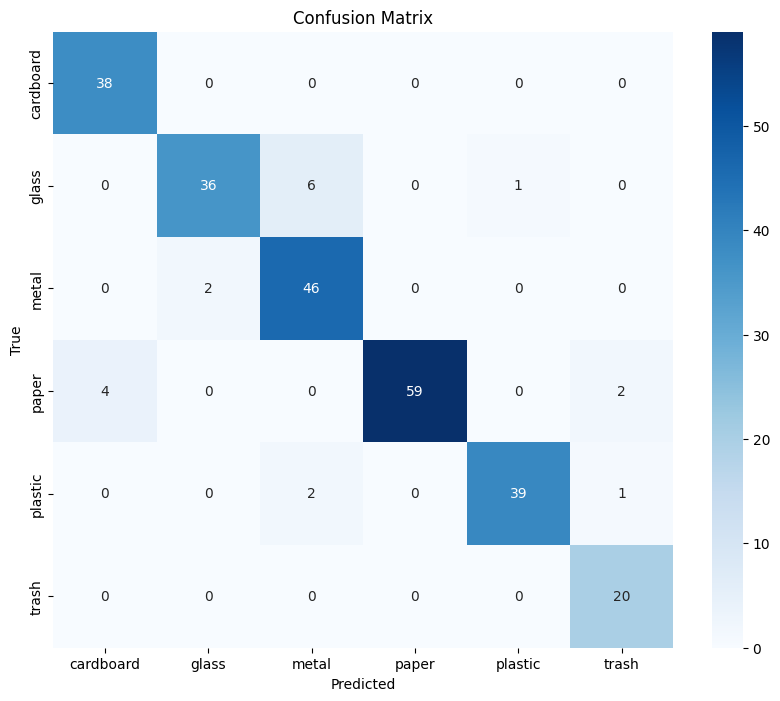

In [41]:
plt.figure(figsize=(10,8))  # Set figure size for better visualization

sns.heatmap(cm, annot=True, fmt='d',  # Create heatmap using confusion matrix
            xticklabels=class_names,  # Set class names for x-axis (predicted labels)
            yticklabels=class_names,  # Set class names for y-axis (true labels)
            cmap='Blues')  # Use a blue colormap for better contrast

plt.xlabel('Predicted')  # Label x-axis as Predicted classes
plt.ylabel('True')  # Label y-axis as True classes
plt.title('Confusion Matrix')  # Add title to the heatmap
plt.show()  # Display the plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


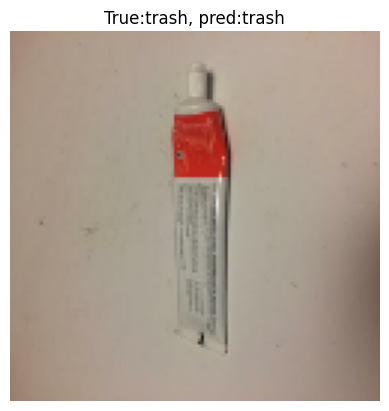

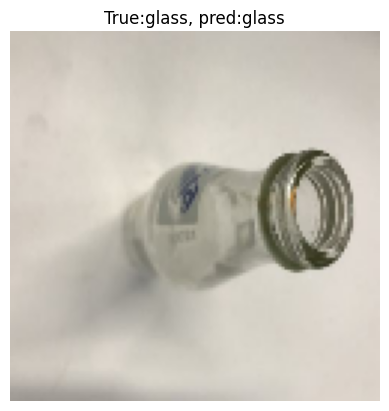

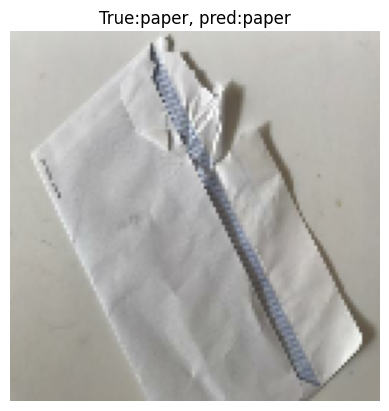

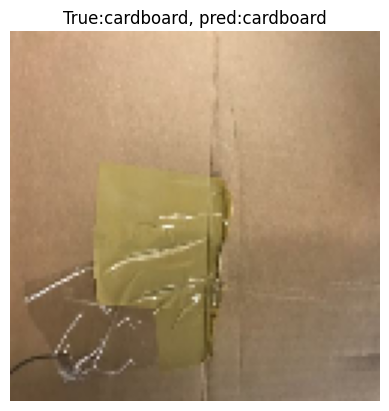

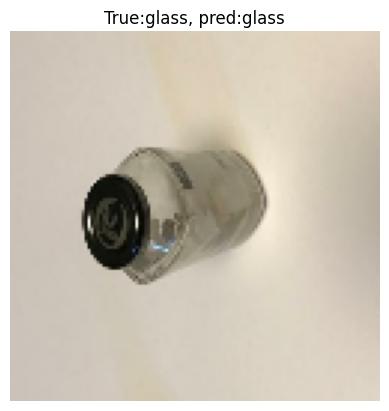

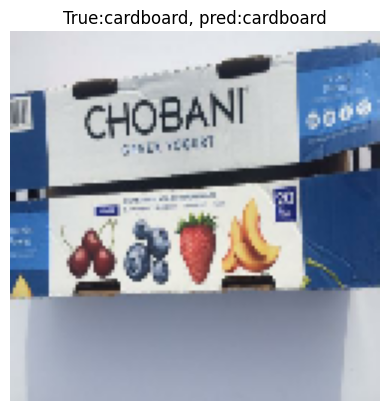

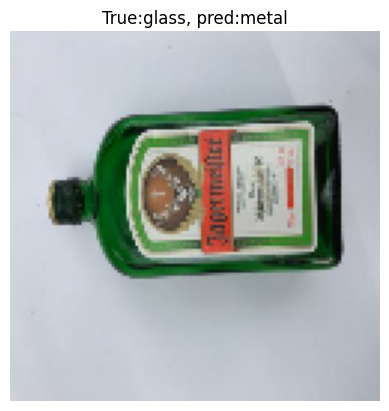

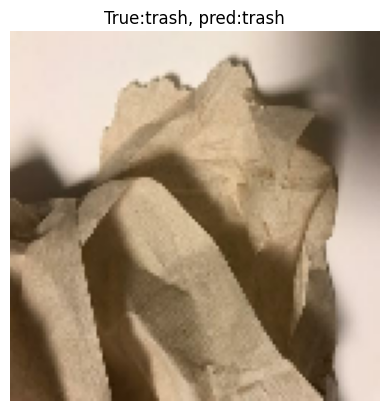

In [42]:
# Extract class names from the training dataset
class_names = train_ds.class_names

# Take one batch of images and labels from the test dataset for evaluation
for images, labels in test_ds_eval.take(1):


    predictions= model.predict(images)
    pred_labels = np.argmax(predictions, axis=1)
    for i in range(8):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True:{class_names[labels[i]]}, pred:{class_names[pred_labels[i]]}")
        plt.axis("off")
        plt.show()

In [43]:
# Save model in Keras format with architecture, weights, and training configuration
model.save('Effiicientnetv2b2.keras')

# Load your Keras model
model = tf.keras.models.load_model('Effiicientnetv2b2.keras')

In [44]:
!pip install gradio

In [45]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

In [46]:
def classify_image(img):
    # Resize image to 124x124 pixels (Note: Comment says 128x128, but code resizes to 124x124)
    img = img.resize((124, 124))

    # Convert image to a NumPy array with float32 dtype
    img_array = np.array(img, dtype=np.float32)
    img_array = preprocess_input(img_array)

    # Expand dimensions to match model input shape (adds a batch dimension)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction using the trained model
    prediction = model.predict(img_array)

    # Get the index of the highest predicted probability
    predicted_class_index = np.argmax(prediction)

    # Map the predicted index to its corresponding class name
    predicted_class_name = class_names[predicted_class_index]

    # Extract confidence score (probability of the predicted class)
    confidence = prediction[0][predicted_class_index]

    # Return formatted prediction result with confidence score
    return f"Predicted: {predicted_class_name} (Confidence: {confidence:.2f})"

In [47]:
iface = gr.Interface(
    fn=classify_image,  # Function to classify image using the trained model
    inputs=gr.Image(type="pil"),  # Accepts input as a PIL image
    outputs="text"  # Outputs prediction as text
)

# Launch the interface
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dbd0210813be9eca42.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
